In [35]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math
from tensorflow import keras

## Régression linéaire

In [36]:
# Parameters (y = a*x + b)
a=0.6
b=2

# Create noisy data
x_data = np.linspace(-10, 10, num=100000)
y_data = a * x_data + b + np.random.normal(size=100000)

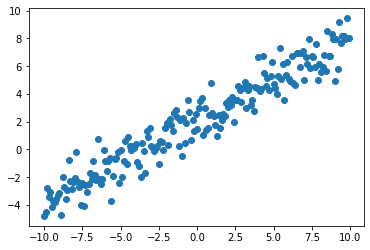

In [37]:
# Show Data
plt.scatter(x_data[::500], y_data[::500])

In [38]:
# Create the model 
model = keras.Sequential()
model.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[1]))
model.compile(loss='mse', optimizer="adam")

# Display the model (only 2 parameters to optimize)
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Learn
model.fit(x_data, y_data, epochs=5, verbose=1)

Epoch 1/5
3125/3125 [==============================] - 2s 496us/step - loss: 3.1717
Epoch 2/5
3125/3125 [==============================] - 2s 528us/step - loss: 0.9989
Epoch 3/5
3125/3125 [==============================] - 2s 510us/step - loss: 1.0003
Epoch 4/5
3125/3125 [==============================] - 2s 500us/step - loss: 0.9919
Epoch 5/5
3125/3125 [==============================] - 2s 517us/step - loss: 0.9960


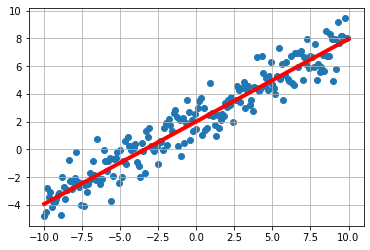

In [40]:
# Predict (compute) the output 
y_predicted = model.predict(x_data)

# Display the result
plt.scatter(x_data[::500], y_data[::500])
plt.plot(x_data, y_predicted, 'r', linewidth=4)
plt.grid()
plt.show()

## Régression non linéaire

In [103]:
# Create noisy data
x_data = np.linspace(-10, 10, num=1000)
y_data = 0.1*x_data*np.cos(x_data) + 0.1*np.random.normal(size=1000)
print('Data created successfully')

Data created successfully


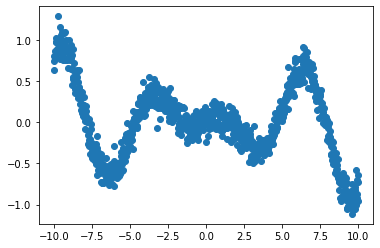

In [104]:
# Show Data
plt.scatter(x_data, y_data)

In [105]:
# Create the model 
model = keras.Sequential()
model.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[1]))
model.add(keras.layers.Dense(units = 1024, activation = 'relu'))
model.add(keras.layers.Dense(units = 102, activation = 'relu'))
model.add(keras.layers.Dense(units = 1, activation = 'linear'))
model.compile(loss='mse', optimizer="adam")

# Display the model
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_43 (Dense)             (None, 64)                128       
_________________________________________________________________
dense_44 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 65        
Total params: 4,355
Trainable params: 4,355
Non-trainable params: 0
_________________________________________________________________


In [106]:
# Training
model.fit(x_data, y_data, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 0s 917us/step - loss: 0.2161
Epoch 2/100
32/32 [==============================] - 0s 914us/step - loss: 0.1884
Epoch 3/100
32/32 [==============================] - 0s 930us/step - loss: 0.1925
Epoch 4/100
32/32 [==============================] - 0s 794us/step - loss: 0.1807
Epoch 5/100
32/32 [==============================] - 0s 812us/step - loss: 0.1792
Epoch 6/100
32/32 [==============================] - 0s 827us/step - loss: 0.1785
Epoch 7/100
32/32 [==============================] - 0s 794us/step - loss: 0.1858
Epoch 8/100
32/32 [==============================] - 0s 749us/step - loss: 0.1756
Epoch 9/100
32/32 [==============================] - 0s 990us/step - loss: 0.1663
Epoch 10/100
32/32 [==============================] - 0s 925us/step - loss: 0.1622
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1649
Epoch 12/100
32/32 [==============================] - 0s 885us/step - loss: 0.1547
Epoch 13/100
32

In [91]:
# Compute the output 
y_predicted = model.predict(x_data)

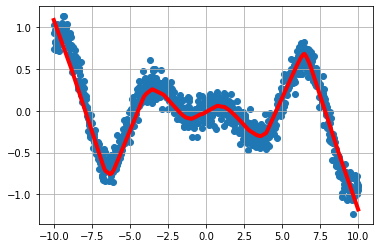

In [92]:
# Display the result
plt.scatter(x_data[::1], y_data[::1])
plt.plot(x_data, y_predicted, 'r', linewidth=4)
plt.grid()
plt.show()

## Modifier le nombre de layer cachée et de nombre d'unit sur les layers : qu'observer vous au niveaux des performances (utiliser la MSE)

32/32 [==============================] - 0s 897us/step - loss: 0.0170


<Figure size 432x288 with 0 Axes>

## Trouver un moyen d'afficher la convergences du modéles aux cours des itérations (afficher le dans un graphique).

In [ ]:
for x in range(100):
  # One epoch
  model.fit( x_data, y_data, epochs=1, verbose=1)

  # Compute the output 
  y_predicted = model.predict(x_data)

  # Display the result
  plt.scatter(x_data[::1], y_data[::1], s=2)
  plt.plot(x_data, y_predicted, 'r', linewidth=4)
  plt.grid()
  plt.ylim(top=1.2)  # adjust the top leaving bottom unchanged
  plt.ylim(bottom=-1.2)  
  #plt.show()
  plt.savefig('training-' + str(x) +'-epochs.png',dpi=300)

  plt.clf()